Используя датасеты о продуктах и их продажах посчитайте корреляции:
* Пирсона
* Спирмена
* Мэтьюса
* Крамера

Ход работы:
* Прочтите данные о продажах и продуктах
* Соедините таблицы друг с другом по id продукта
* Посчитайте корреляцию Спирмена временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Посчитайте корреляцию Пирсона временного ряда продаж каждого продукта с каждым, используя соединенную таблицу
* Найдите наиболее коррелирующий товар с American Chicken Hot Dogs по значению корреляции Спирмена и Пиарсона
* Постройте график зависимости продаж American Chicken Hot Dogs от найденного товара (scatterplot) и постройте два графика 1) зависимости продаж American Chicken Hot Dogs от времени 2) зависимости продаж найденного товара от времени (lineplot).
* Найдите корреляцию Мэтьюса между recyclable_package и low_fat
* Постройте гистограммы recyclable_package и low_fat.
* Найдите корреляцию Крамера между store_id и brand_name. Есть ли корреляция между этими признаками?
* Визуализируйте зависимость store_id и brand_name. Тут подумайте, как это можно сделать.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats.contingency import association # cramer
# confusion_matrix = pd.crosstab(label, x) # это ожидается на вход в методе выше, изучите документацию
from scipy.stats import pearsonr # pearson
from scipy.stats import  spearmanr # spearman
from sklearn.metrics import matthews_corrcoef # matthews
from matplotlib import pyplot as plt

In [5]:
products = pd.read_csv("foodmart.products.tsv", sep='\t', index_col=1)

products

,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth
product_id,,,,,,,,,,,,,,
1,30,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.90,12.60,7.40
2,52,Washington,Washington Mango Drink,96516502499,0.74,7.42,4.42,False,True,18,8,13.40,3.71,22.60
3,52,Washington,Washington Strawberry Drink,58427771925,0.83,13.10,11.10,True,True,17,13,14.40,11.00,7.77
4,19,Washington,Washington Cream Soda,64412155747,3.64,10.60,9.60,True,False,26,10,22.90,18.90,7.93
5,19,Washington,Washington Diet Soda,85561191439,2.19,6.66,4.65,True,False,7,10,20.70,21.90,19.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1556,53,CDR,CDR Creamy Peanut Butter,29538288712,2.65,6.94,3.94,True,True,7,9,11.10,3.98,17.50
1557,33,CDR,CDR Strawberry Preserves,50687324404,1.20,15.40,13.30,True,False,15,6,14.10,14.80,19.30
1558,53,CDR,CDR Extra Chunky Peanut Butter,84930775761,2.16,11.50,9.50,False,True,22,10,7.35,9.29,12.40


In [6]:
sales = pd.read_csv("foodmart.sales.tsv", sep='\t', index_col=0)

sales

,store_id,date,sales
product_id,,,
4,6,1997-01-01,4
25,6,1997-01-01,3
48,6,1997-01-01,3
76,6,1997-01-01,4
119,6,1997-01-01,3
...,...,...,...
1266,14,1997-12-30,1
1376,14,1997-12-30,2
1380,14,1997-12-30,1


In [7]:
data = pd.merge(products, sales, on='product_id')

data

,product_class_id,brand_name,product_name,SKU,SRP,gross_weight,net_weight,recyclable_package,low_fat,units_per_case,cases_per_pallet,shelf_width,shelf_height,shelf_depth,store_id,date,sales
product_id,,,,,,,,,,,,,,,,,
1,30,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,7,1997-01-03,4
1,30,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,13,1997-01-11,3
1,30,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,17,1997-02-17,3
1,30,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,24,1997-03-15,3
1,30,Washington,Washington Berry Juice,90748583674,2.85,8.39,6.39,False,False,30,14,16.9,12.6,7.4,7,1997-04-07,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1559,33,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.3,20.2,18.8,16,1997-11-22,3
1559,33,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.3,20.2,18.8,6,1997-12-01,2
1559,33,CDR,CDR Apple Preserves,75317577719,1.62,21.00,20.00,False,False,7,9,15.3,20.2,18.8,16,1997-12-05,4


In [8]:
# подсказка по пунктам 3 и 4.
sparse_sales = pd.pivot_table(sales, values='sales', index=['date', 'store_id'],
                     columns=['product_id'], fill_value = 0)
# переход от смердженной таблицы к удобной таблице продаж

pearson_corr = sparse_sales.corr(method='pearson')

pearson_corr

product_id,1,2,3,4,5,6,7,8,9,10,...,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559
product_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.031946,0.064226,-0.021103,0.037920,0.050541,-0.048885,-0.001291,0.079075,0.039953,...,0.008166,-0.035075,-0.022838,-0.028683,0.019283,-0.006411,-0.049169,-0.046480,0.053815,0.013430
2,-0.031946,1.000000,-0.051093,0.116748,-0.030056,-0.026589,0.047577,0.014672,0.026534,-0.020503,...,0.009571,0.056652,0.032602,0.006232,0.113170,0.038916,-0.016453,-0.002671,-0.011109,0.028038
3,0.064226,-0.051093,1.000000,-0.024334,-0.046996,0.002794,0.027834,0.023594,0.027910,0.043123,...,0.092207,0.076354,0.031992,0.008608,-0.021955,0.024485,0.088816,0.042090,0.132232,-0.008858
4,-0.021103,0.116748,-0.024334,1.000000,0.023312,-0.008319,0.023574,0.037485,-0.024724,0.068547,...,0.005374,0.094244,-0.005947,0.141162,0.049643,-0.011130,0.007113,-0.013466,-0.026888,0.040363
5,0.037920,-0.030056,-0.046996,0.023312,1.000000,0.111450,0.018490,0.009293,0.090849,-0.025958,...,0.006680,-0.012650,0.036780,0.030386,-0.067718,-0.028371,-0.021919,0.064471,0.092813,-0.004688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,-0.006411,0.038916,0.024485,-0.011130,-0.028371,0.077218,-0.008636,0.082250,0.094897,0.009563,...,0.089168,-0.030569,0.066305,0.036616,-0.003249,1.000000,0.022462,0.086640,0.007673,0.113678
1556,-0.049169,-0.016453,0.088816,0.007113,-0.021919,0.093628,0.037174,-0.008440,0.038568,0.051227,...,0.013888,0.025699,0.016731,0.128589,-0.023762,0.022462,1.000000,0.005294,0.024817,-0.046901
1557,-0.046480,-0.002671,0.042090,-0.013466,0.064471,0.086258,0.021921,0.103232,0.044506,-0.011313,...,0.007601,-0.007601,0.057072,0.038082,0.035013,0.086640,0.005294,1.000000,0.113069,0.045262


In [9]:
spearman_corr = sparse_sales.corr(method='spearman')

spearman_corr

product_id,1,2,3,4,5,6,7,8,9,10,...,1550,1551,1552,1553,1554,1555,1556,1557,1558,1559
product_id,,,,,,,,,,,,,,,,,,,,,
1,1.000000,-0.024756,0.047632,-0.021596,0.047079,0.033262,-0.053064,-0.023655,0.051789,0.040869,...,0.010799,-0.037126,-0.020724,-0.020874,-0.002497,0.004791,-0.052088,-0.049587,0.057852,0.006378
2,-0.024756,1.000000,-0.048897,0.159320,-0.025042,-0.003357,0.018770,-0.000819,0.041751,-0.028520,...,0.012220,0.051011,0.029600,0.025918,0.099993,0.026242,-0.003020,0.005478,-0.019732,0.006919
3,0.047632,-0.048897,1.000000,-0.024572,-0.039504,0.031547,0.013656,0.030954,0.013244,0.067247,...,0.115108,0.008658,0.022451,-0.019390,-0.018619,0.037684,0.096608,0.060990,0.037952,-0.015815
4,-0.021596,0.159320,-0.024572,1.000000,-0.019259,-0.014695,0.037459,0.038378,-0.041462,0.038633,...,0.013935,0.080121,-0.008911,0.120161,0.063043,-0.012768,0.020378,-0.010963,-0.018827,0.036505
5,0.047079,-0.025042,-0.039504,-0.019259,1.000000,0.107883,0.015116,0.014216,0.088316,-0.039151,...,0.027065,-0.019146,0.047449,0.068494,-0.074215,-0.043276,-0.006567,0.069196,0.102898,0.015152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1555,0.004791,0.026242,0.037684,-0.012768,-0.043276,0.082068,-0.002322,0.075558,0.150581,0.030950,...,0.079208,-0.027924,0.052508,0.013825,-0.008779,1.000000,0.020881,0.089920,0.019061,0.095425
1556,-0.052088,-0.003020,0.096608,0.020378,-0.006567,0.095873,0.064285,-0.006057,0.020104,0.068405,...,0.010527,0.021352,0.024211,0.091019,-0.016507,0.020881,1.000000,0.002583,0.034654,-0.052087
1557,-0.049587,0.005478,0.060990,-0.010963,0.069196,0.069984,0.021506,0.098188,0.067023,-0.025261,...,0.016071,-0.000955,0.074315,-0.005143,0.046636,0.089920,0.002583,1.000000,0.087643,0.037481


In [10]:
ACHD_index = products[products.product_name == 'American Chicken Hot Dogs'].index[0]
spearman_best_corr_index = list(spearman_corr[ACHD_index]).index(sorted(spearman_corr[ACHD_index])[-2]) + 1
pearson_best_corr_index = list(pearson_corr[ACHD_index]).index(sorted(pearson_corr[ACHD_index])[-2]) + 1

spearman_name, pearson_name = products.loc[spearman_best_corr_index, 'product_name'], products.loc[pearson_best_corr_index, 'product_name']

spearman_name, pearson_name

('Great Cranberry Muffins', 'Mighty Good Monthly Home Magazine')

<Axes: xlabel='278', ylabel='1001'>

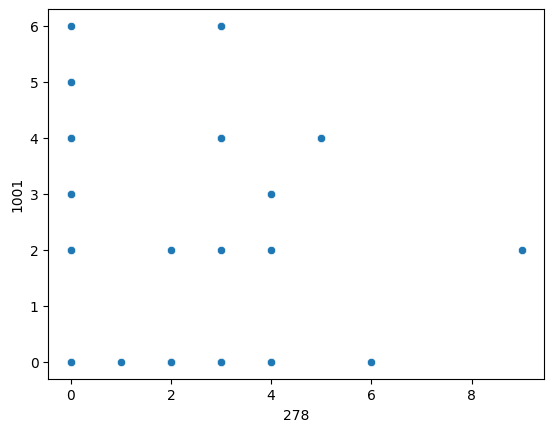

In [11]:
sns.scatterplot(x=sparse_sales[spearman_best_corr_index], y=sparse_sales[ACHD_index])

<Axes: xlabel='1107', ylabel='1001'>

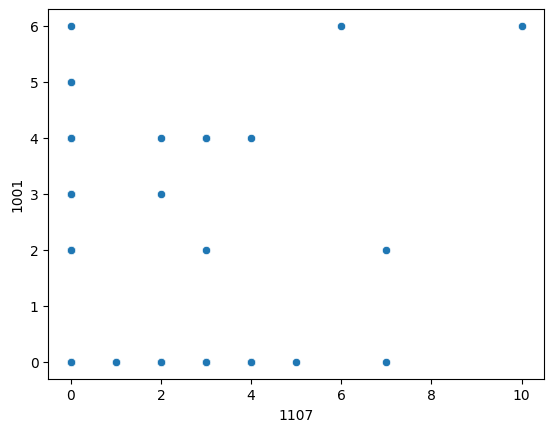

In [12]:
sns.scatterplot(x=sparse_sales[pearson_best_corr_index], y=sparse_sales[ACHD_index])

Text(0, 0.5, 'American Chicken Hot Dogs')

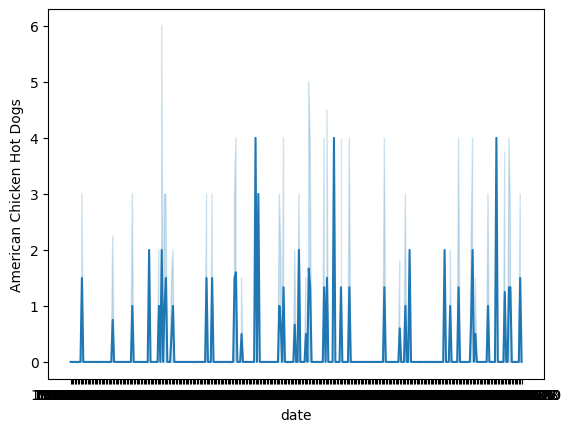

In [13]:
sns.lineplot(sparse_sales, x='date', y=ACHD_index)

plt.ylabel('American Chicken Hot Dogs')

Text(0, 0.5, 'Great Cranberry Muffins')

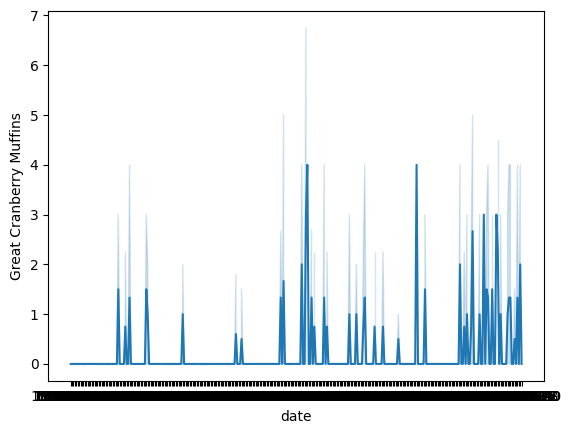

In [14]:
sns.lineplot(sparse_sales, x='date', y=spearman_best_corr_index)

plt.ylabel(spearman_name)

Text(0, 0.5, 'Mighty Good Monthly Home Magazine')

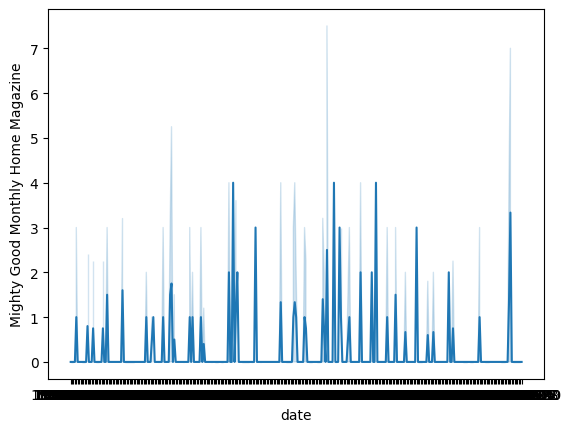

In [15]:
sns.lineplot(sparse_sales, x='date', y=pearson_best_corr_index)

plt.ylabel(pearson_name)

In [16]:
matthews_corrcoef(products['low_fat'], products['recyclable_package'])

np.float64(-0.02675542252327238)

<Axes: xlabel='low_fat', ylabel='Count'>

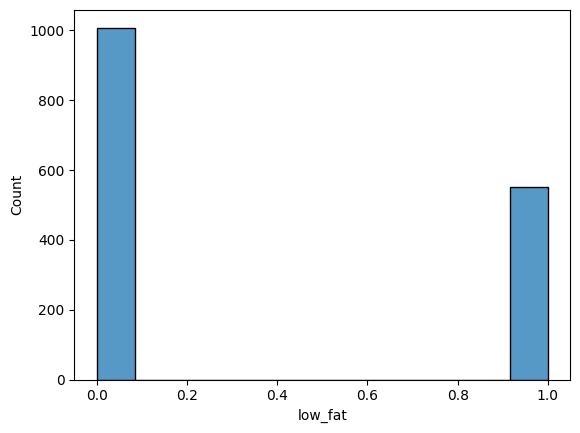

In [17]:
sns.histplot(products, x='low_fat')

<Axes: xlabel='recyclable_package', ylabel='Count'>

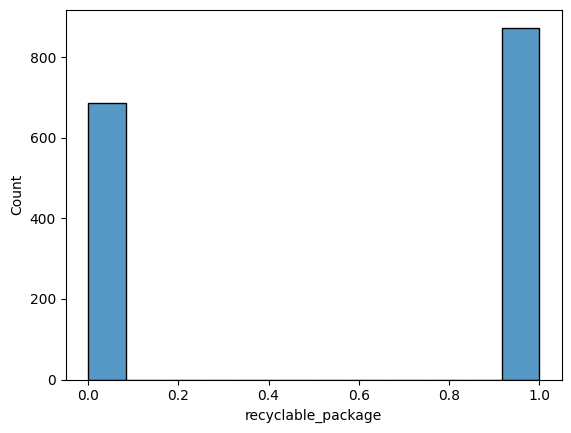

In [18]:
sns.histplot(products, x='recyclable_package')

In [19]:
crosstab = pd.crosstab(data["store_id"], data["brand_name"])

crosstab.head(5)

brand_name,ADJ,Akron,American,Amigo,Applause,Atomic,BBB Best,Best,Best Choice,Better,...,Thresher,Tip Top,Token,Top Measure,Toretti,Toucan,Tri-State,Urban,Walrus,Washington
store_id,,,,,,,,,,,,,,,,,,,,,
2,2,3,17,1,3,5,25,2,39,19,...,4,0,13,4,0,2,27,1,6,8
3,4,13,71,11,13,50,159,13,151,123,...,42,7,69,34,1,16,214,29,43,45
6,8,9,61,12,6,28,141,19,132,73,...,32,9,59,30,4,8,172,24,40,47
7,7,12,74,6,10,49,171,15,163,105,...,36,6,55,39,5,6,215,27,42,53
11,9,15,70,14,12,47,147,18,183,136,...,43,6,55,40,6,10,216,27,39,49


In [20]:
association(crosstab, method="cramer")

0.0343024046787291

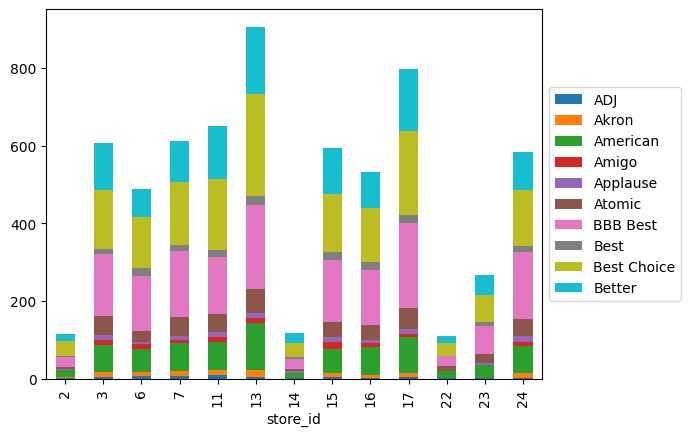

In [21]:
crosstab.iloc[:, :10].plot.bar(stacked=True).legend(
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)